In [1]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_circles
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

C:\Users\shivang\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\shivang\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\shivang\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
data = np.load('../datasets/mnist_train_small.npy')

In [3]:
X = data[:,1:]
Y = data[:,0]


In [4]:
X.shape, Y.shape

((19999, 784), (19999,))

In [5]:
X_train, X_test, Y_train,Y_test = train_test_split(X,Y,test_size=0.33,random_state=42)


In [6]:
model = KNeighborsClassifier()

In [7]:
model.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [8]:
model.predict(X_test[:10])

array([1, 7, 0, 9, 4, 5, 4, 6, 9, 2], dtype=uint8)

In [9]:
Y_test[:10]

array([7, 7, 0, 9, 4, 5, 4, 6, 9, 2], dtype=uint8)

In [10]:
model.score(X_test[:100],Y_test[:100])

0.95

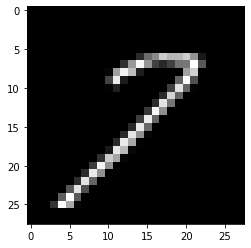

In [11]:
plt.imshow(X_test[0].reshape(28,28),cmap="gray")

In [12]:
# y do we need svm
# Linearly seperable data - we use logistic regression
# howevwe if th data is not seperated or it is not possibble to make a linear line to seperate the two classes
# or we can increase the dimensionality of the data (Manually) and use a plane to seperate the data and these use logistic regression
# Or we can use Svm which helps us in increasning the dimension and therfore seperate data

In [13]:
X,Y= make_circles(n_samples=500)

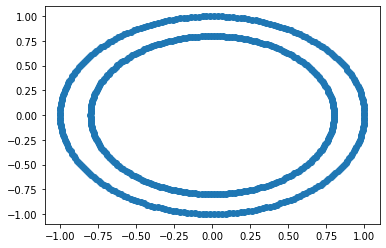

In [14]:
plt.scatter(X[:,0],X[:,1])
plt.show()

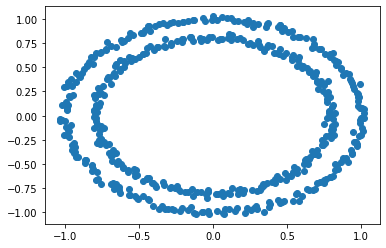

In [15]:
X,Y = make_circles(n_samples=500,noise=0.02)
plt.scatter(X[:,0],X[:,1])
plt.show()

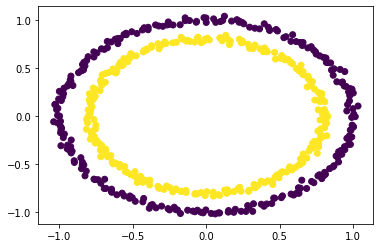

In [16]:
X,Y = make_circles(n_samples=500,noise=0.02)
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [18]:
model = LogisticRegression()
model.fit(X,Y)
model.score(X,Y)

0.506

In [19]:
lr = LogisticRegression()

In [20]:
acc = cross_val_score(lr,X,Y,cv=5).mean()
print("Accuracy X(2D) is %.4f"%(acc*100))

Accuracy X(2D) is 44.0000


In [21]:
# Increase the dimension. Now we have to use a mathematical aldorithm to increase the dimesion.Different type of data has different algorithm to increase dimensionality.
# different for text,circle,pictures,sparse matrix etc..
# these different types are  knoen as kernels in SVM


In [22]:
def dim(X):
    X1 = X[:,0]
    X2 = X[:,1]
    X3 = X1**2 + X2**2 #(CUSTOM KERNEL) creating a third function manuallly using any arbritayry function
    
    X_ = np.zeros((X.shape[0],3))
    X_[:,:-1] = X
    X_[:,-1] = X3
    
    return X_
    

In [23]:
X_ = dim(X)

In [24]:
X_

array([[ 0.33211908,  0.74043468,  0.6585466 ],
       [-0.60798641,  0.46684279,  0.58758967],
       [ 0.39352336, -0.94145004,  1.04118882],
       ...,
       [ 0.59582842, -0.82473112,  1.03519293],
       [-0.38780427, -0.96232034,  1.07645259],
       [ 0.79079331, -0.21846743,  0.67308207]])

In [25]:
X_.shape

(500, 3)

In [26]:
X_[:2,:]

array([[ 0.33211908,  0.74043468,  0.6585466 ],
       [-0.60798641,  0.46684279,  0.58758967]])

In [27]:
def plot3d(X,show=True):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111,projection='3d')
    X1 = X[:,0]
    X2 = X[:,1]
    X3 = X[:,2]
    
    ax.scatter(X1,X2,X3,zdir='z',s=20,c=Y,depthshade=True)
    
    if(show==True):
        plt.show()
    return ax

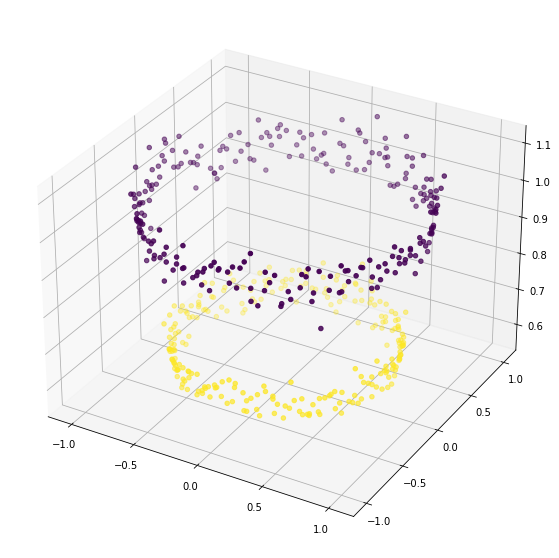

In [28]:
ax = plot3d(X_,True)

In [29]:
lr = LogisticRegression()
lr.fit(X_,Y)
lr.score(X_,Y)

1.0

In [30]:
wts =lr.coef_
bias = lr.intercept_
wts,bias

(array([[  0.02613438,  -0.01961406, -10.87736325]]), array([8.92251249]))

In [31]:
xx,yy = np.meshgrid(range(-2,2),range(-2,2))
print(xx)
print(yy)

[[-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]]
[[-2 -2 -2 -2]
 [-1 -1 -1 -1]
 [ 0  0  0  0]
 [ 1  1  1  1]]


In [32]:
z = -(wts[0,0]*xx + wts[0,1]*yy+bias)/wts[0,2]
print(z)


[[0.81908378 0.82148642 0.82388906 0.8262917 ]
 [0.81728058 0.81968322 0.82208586 0.8244885 ]
 [0.81547738 0.81788002 0.82028266 0.8226853 ]
 [0.81367418 0.81607682 0.81847946 0.8208821 ]]


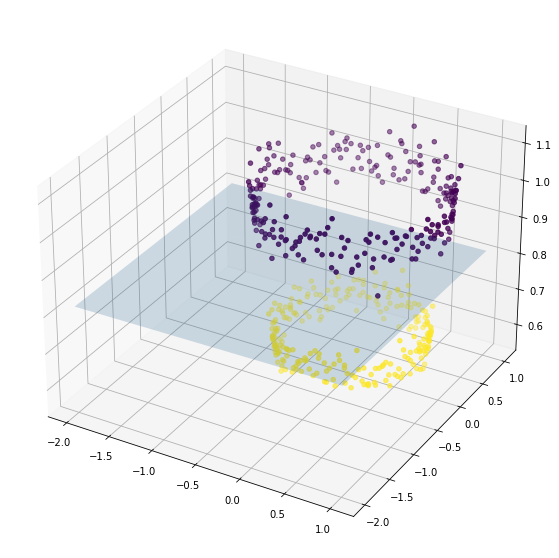

In [33]:
ax = plot3d(X_,False)
ax.plot_surface(xx,yy,z,alpha=0.2)
plt.show()

In [34]:
# SVM
# In SVM a hyperplane seperates our data
# HOW?
# the dimenssions of the hyperplane is n-1 where m is the number of dimensions of the data which has to seperatted
# a hyperplane is formed on the basis, that the distance of it frrom the nearest points is maximum possible
# wx+b is the equation of a hyperplane and therfore if wx+b for a point >0 ,then it bbelonggs to class 1, else class 0
# Key-idea sepreate the data with maximum margin
# wX+b =0
# theta0 + theta1*x1 +.........thetan*xn =X  
# More distance of a point from hyperplane,then more confidence  
# a hperplane should be as such that even a slight or large shift should not affect the data
# Logisttic regression ----> {0,1} class 0 or 1 ,function of Likehood, probabilistic
# SVM regression------> {-1,1} class 0 or 1, function of distance
# distance of a point defined by coordinate vector X, from the plane wx+b, is given by w(Transposse)*X +b/ sqrt(w1^2+w2^2+......wn^2)
# sqrt(w1^2+w2^2+......wn^2) ---> L2 normal --->euclidiean distance ||W||^2 mode W
# Goal: maximise minimium distance of point from hyperplane
# I.e. minimise ||w||/2 with each point having monimum 1/||w|| distance from hyperplane
# we sqaure ||w|| to make it convex and make calculations easier.
# constraints : yi * (wT* xi + b/or radius)>=1, now the problme in convex, but we might not reach the minima using gradient descent as we have constraints
# there ar many methods eg. pegasos: converts constrained problem into unconstrained problem.

# Handling Outliers in SVM
# WE will add some error to each point in the data, since, without error, the hyperplane formed will be less confident i.e. more inclined towaards a particculr class.
# therefore we modify the equation as 1/2 w*wT + c*sum(error[i]) = Loss
# therefore yi * (wT*xi + b) >= 1-ei
# some points can have constrain value less than 1
# the value c the amount of penalty to gice when the error occurs

# if c is large:
#     No misssed classification
#     overfitting
# else if c->small:
#     some missed classification
#     but margin is maximisation
#     Better

# What does pegasos and other algorithms do?
# initaly: Non-Convex--> Convex with constraint
# pegasos: Convex with constraint---->convex witthout constraint
# so that we can apply gradient descend

# ei = 1 - yi(wTxi + b) ---->let ti = yi(wTxi + b) 
# ei>=0
# ei = max(0,1-ti)
# L = min[1/2 (wT.w) + c* sum(max(0,1-ti))]


In [35]:
from sklearn import svm

In [36]:
svc = svm.SVC(kernel="linear")

In [37]:
svc.fit(X,Y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [38]:

svc.score(X,Y)

0.506

In [39]:
svc = svm.SVC(kernel="rbf")
svc.fit(X,Y)
svc.score(X,Y)

1.0

In [40]:

svc = svm.SVC(kernel="poly")
svc.fit(X,Y)
svc.score(X,Y)

0.556

In [41]:

def custom_kernel(x1,x2):
    return np.square(np.dot(x1,x2.T))

svc = svm.SVC(kernel=custom_kernel)
svc.fit(X,Y)
svc.score(X,Y)

1.0